In [1]:
import pandas as pd
import numpy as np
import nltk
from matplotlib import pyplot as plt

In [2]:
#nltk.download()

In [3]:
text_data="Before 1949, computers could execute commands, but they could not remember what they did as they were not able to store these commands. In 1950, Alan Turing discussed how to build intelligent machines and test this intelligence in his paper “Computing Machinery and Intelligence.” Five years later, the first AI program was presented at the Dartmouth Summer Research Project on Artificial Intelligence (DSPRAI). This event catalyzed AI research for the next few decades."

In [4]:
text_data

'Before 1949, computers could execute commands, but they could not remember what they did as they were not able to store these commands. In 1950, Alan Turing discussed how to build intelligent machines and test this intelligence in his paper “Computing Machinery and Intelligence.” Five years later, the first AI program was presented at the Dartmouth Summer Research Project on Artificial Intelligence (DSPRAI). This event catalyzed AI research for the next few decades.'

### Tokenization
     Sentence Tokenization
     Word Tokenization

In [5]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [6]:
sent_token=sent_tokenize(text_data)

In [7]:
sent_token

['Before 1949, computers could execute commands, but they could not remember what they did as they were not able to store these commands.',
 'In 1950, Alan Turing discussed how to build intelligent machines and test this intelligence in his paper “Computing Machinery and Intelligence.” Five years later, the first AI program was presented at the Dartmouth Summer Research Project on Artificial Intelligence (DSPRAI).',
 'This event catalyzed AI research for the next few decades.']

In [8]:
len(sent_token)

3

In [9]:
word_token=word_tokenize(text_data)

In [10]:
#word_token

In [11]:
len(word_token)

84

### word frequency 

In [12]:
from nltk.probability import FreqDist

In [13]:
distribution = FreqDist(word_token[:20])
print(distribution)

<FreqDist with 15 samples and 20 outcomes>


In [14]:
# Most common words
distribution.most_common(2)

[('they', 3), (',', 2)]

In [15]:
freq = nltk.FreqDist(word_token)
df = pd.DataFrame.from_dict(freq, orient='index')
df = df.rename(columns={0:'freq'})
result = df.sort_values(['freq'], ascending=False)

result.head(10)

,freq
",",4
.,3
they,3
the,3
could,2
commands,2
not,2
AI,2
to,2
and,2


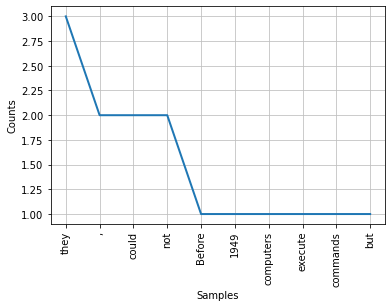

In [16]:
distribution.plot(10)
plt.show()

### Stopwords

In [17]:
from nltk.corpus import stopwords

In [18]:
stopwords_default = stopwords.words('english')
print('Stopwords in NLTK: ',len(stopwords_default))

Stopwords in NLTK:  179


In [19]:
#stopwords_default

In [20]:
filtered_words = []
for word in word_token:
    if word not in stopwords_default:
        filtered_words.append(word)
#filtered_words


### Lemmatization and Stemming

In [21]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
print(ps.stem("stemming"))

stem


In [22]:
sentence = "connection connecting connected and connected . he went "
words = nltk.word_tokenize(sentence)
for word in words:
    ps = PorterStemmer()
    print(ps.stem(word))

connect
connect
connect
and
connect
.
he
went


In [23]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [24]:
print(lemmatizer.lemmatize("bats"))

bat


In [25]:
print(lemmatizer.lemmatize("feet"))

foot


In [26]:
print(lemmatizer.lemmatize("running","n"))

running


### Pos

In [27]:
nltk.pos_tag(word_token)

[('Before', 'IN'),
 ('1949', 'CD'),
 (',', ','),
 ('computers', 'NNS'),
 ('could', 'MD'),
 ('execute', 'VB'),
 ('commands', 'NNS'),
 (',', ','),
 ('but', 'CC'),
 ('they', 'PRP'),
 ('could', 'MD'),
 ('not', 'RB'),
 ('remember', 'VB'),
 ('what', 'WP'),
 ('they', 'PRP'),
 ('did', 'VBD'),
 ('as', 'IN'),
 ('they', 'PRP'),
 ('were', 'VBD'),
 ('not', 'RB'),
 ('able', 'JJ'),
 ('to', 'TO'),
 ('store', 'VB'),
 ('these', 'DT'),
 ('commands', 'NNS'),
 ('.', '.'),
 ('In', 'IN'),
 ('1950', 'CD'),
 (',', ','),
 ('Alan', 'NNP'),
 ('Turing', 'NNP'),
 ('discussed', 'VBD'),
 ('how', 'WRB'),
 ('to', 'TO'),
 ('build', 'VB'),
 ('intelligent', 'JJ'),
 ('machines', 'NNS'),
 ('and', 'CC'),
 ('test', 'NN'),
 ('this', 'DT'),
 ('intelligence', 'NN'),
 ('in', 'IN'),
 ('his', 'PRP$'),
 ('paper', 'NN'),
 ('“', 'NN'),
 ('Computing', 'VBG'),
 ('Machinery', 'NNP'),
 ('and', 'CC'),
 ('Intelligence.', 'NNP'),
 ('”', 'NNP'),
 ('Five', 'CD'),
 ('years', 'NNS'),
 ('later', 'RB'),
 (',', ','),
 ('the', 'DT'),
 ('first', 'JJ'

### word cloud

In [28]:
from wordcloud import WordCloud,STOPWORDS

In [29]:
word_cloud=WordCloud(collocations=False,background_color='white').generate(text_data)

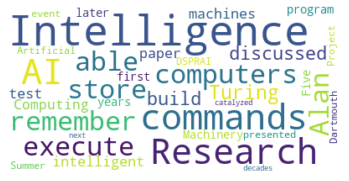

In [30]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()